<a href="https://colab.research.google.com/github/Alejandro-RL/RNA-Atividade-2.1/blob/main/Partes%20do%20Trabalho/RNA_Atividade_2_1__Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports e Arquivos

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from tabulate import tabulate

In [ ]:
!wget https://www.dropbox.com/s/8l7ced95mb4k9ds/dataAll.txt
!wget https://www.dropbox.com/s/jad0ciovllm7y2y/data1.txt
!wget https://www.dropbox.com/s/mnzqvzttfan3r3f/dataHoldout.txt

# Parte I – Resolvendo um Problema Linearmente Separável

In [13]:
'''
Função de Ativação de Degrau com θ = 0;
Taxa de Aprendizado: η = 0,1;
Vetor inicial de pesos: wi ∼ U(−0,5, + 0,5). (Imprimir no começo);
A cada época deve ser indicado o número de ajustes feitos no vetor de pesos;
Sempre que o vetor de pesos for ajustado, este deve ser impresso;
O algoritmo deve ser executado até a convergência;

No final, imprimir:
- O número total de ajustes no vetor de pesos;
- O número de épocas até a convergência;
- O gráfico contendo todos os exemplos do conjunto de dados e a reta que separa as classes
obtida como resultado do treinamento do neurônio Perceptron. Respeitar o esquema de
cores proposto inicialmente e apresentar a solução de maneira clara neste gráfico.

'''

array_all = np.fromfile("/content/dataAll.txt")
array_all = array_all.ravel()
'''
O array vem na forma (N,1), N = número de dados total.
Para organizar por cada exemplo, precisamos mudar a forma da array.
Cada exemplo deve ter o formato [x1,x2,yd], pois são 3 dados para cada
Então o array deve ficar com 3 colunas.
O número de linhas deve ser N/colunas.
'''
colunas = 3
array_all = array_all.reshape(len(array_all)//colunas, colunas)
exemplo = np.array([[2,2,1],[4,4,0]])

In [14]:
class Neuronio:
  #As variáveis do neurônio
  #(Aqui ficam os elementos gerais da classe)
  #(Para acessá-las, use self.[variável])
  bias = -1
  degrau = 0
  taxa_aprendizado = 0.1
  taxa_inicial = [-0.5, 0.5]

  def __init__(self, exemplos):
    #As variáveis dos exemplos
    #(Aqui ficam os elementos individuais de cada objeto)
    self.exemplos = exemplos

    #Extraindo os resultados esperados
    self.resultados_esperados = np.zeros(len(self.exemplos))
    for i in range(len(self.exemplos)):
      self.resultados_esperados[i] = self.exemplos[i][-1]
    
    #Agora criaremos um outro array com o bias no ínicio e sem o valor esperado
    self.exemplos_bias = np.zeros_like(self.exemplos, dtype=np.float64)
    
    for i in range(len(self.exemplos)):
      for j in range(len(self.exemplos[i])):
        self.exemplos_bias[i][0] = self.bias
        self.exemplos_bias[i][1] = self.exemplos[i][0]
        self.exemplos_bias[i][2] = self.exemplos[i][1]
      

    self.ajustes = 0
    #variável auxiliar para contar os ajustes
    self.aux = 0
    self.epocas = 0
    self.resultados_algoritmo = np.zeros(len(self.exemplos_bias))

    #Definindo o tamanho da lista de pesos
    self.pesos = np.zeros(len(self.exemplos_bias[0]), dtype=np.float64)

    for i in range(len(self.pesos)):
        self.pesos[i] = random.uniform(-0.5,0.5)

    #PESOS DE TESTE
    #self.pesos = np.array([-0.5441,0.5562,-0.4074])

    print("Pesos iniciais:")
    m = np.array([self.pesos])
    header = ["bias","x1","x2"]
    table = tabulate(m,header,tablefmt="fancy_grid")
    print(table)


  def ativacao_degrau(self,u):
    '''
    Função de Ativação Degrau:
    (degrau = θ)
    Se u for maior ou igual a θ, retorna 1
    Caso contrário, retorna 0
    '''
    if(u >= self.degrau):
      return 1
    else:
      return 0


  def teste(self):
    '''
    Precisamos testar se os valores coincidem com o gabarito
    retorna: 
    - True,  se coincidir com o gabarito
    - False, se não coincidir 
    '''
    j = 0
    for i in self.exemplos_bias:
      #u = bias*pesos[0] + x1*pesos[1]... + xn*pesos[n]
      u = i[0]*self.pesos[0]+i[1]*self.pesos[1]+i[2]*self.pesos[2]
      self.resultados_algoritmo[j] = self.ativacao_degrau(u)        
      j +=1
    
    for i in range(len(self.resultados_algoritmo)):
      if(self.resultados_algoritmo[i] != self.resultados_esperados[i]):
          return False
    return True
  
  def ajuste(self):
    '''
    Faz o ajuste de pesos usando a Regra Delta
    '''
  
    self.aux = 0
    for i in range(len(self.exemplos_bias)):
      for j in range(len(self.pesos)):
        #Regra Delta
        erro = self.resultados_esperados[i] - self.resultados_algoritmo[i]
        self.pesos[j] = self.pesos[j] + self.taxa_aprendizado*erro*self.exemplos_bias[i][j]
      
      # Se o erro for diferente de zero, significa que os resultados não convergiram
      # Portanto, os pesos precisam ser atualizados

    
      if (erro != 0):
        self.ajustes +=1
        self.aux +=1
        m = np.array([self.pesos])

    
    #Print de informações
    print("Na época:",self.epocas,"Houve",self.aux,"ajuste(s)")
    print("Pesos ajustados:")
    header = ["bias","x1","x2"]
    table = tabulate(m,header,tablefmt="fancy_grid")
    print(table)
      
    

  def treinamento(self):
    '''
    Treina o algoritmo até a convergência
    '''
    
    while (not self.teste()):
      self.epocas += 1
      self.ajuste()
      
    
    #Na última época, o self.teste retorna True, e portanto o while não é ativado
    #Os pesos estão certos, mas é preciso adicionar 1 ao contador de épocas
    self.epocas += 1

    #Em um problema com convergência, A última época sempre tem 0 ajustes
    print("Na época:",self.epocas,"Houve",0,"ajuste(s)")

    print('---')    
    print("Total de Ajustes:", self.ajustes)
    print("Total de Épocas:", self.epocas)
    print("Pesos finais:")
    m = np.array([self.pesos])
    header = ["bias","x1","x2"]
    table = tabulate(m,header,tablefmt="fancy_grid")
    print(table)
  
  def grafico(self):
    #coordenadas dos pontos + cor
    x = np.zeros(len(self.exemplos), dtype=np.float64)
    y = x.copy()
    cor = []

    for i in range(len(self.exemplos)):
      x[i] = self.exemplos[i][0]
      y[i] = self.exemplos[i][1]

      if(self.resultados_algoritmo[i] == 1):
        cor.append('blue')
      else:
        cor.append('red')

    #função da linha
    minimo = x.min() or y.min()
    maximo = x.max() and y.max()
    valor1 = self.pesos[0]/self.pesos[2]
    valor2 = self.pesos[1]/self.pesos[2]
    x2 = np.linspace(minimo -1,maximo + 1, 100)
    y2 = valor1 - valor2*x2    

    #gráfico em sí
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.rcParams['figure.dpi'] = 100

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.scatter(x,y, marker='o',color=cor)
    plt.plot(x2, y2)



    
  def getPesos(self):
     return self.pesos
  
  def getExemplos_Bias(self):
     return self.exemplos_bias
  

  def getResultados_Algoritmo(self):
     return self.resultados_algoritmo

Teste1 = Neuronio(array_all)

Pesos iniciais:
╒═══════════╤═══════════╤══════════╕
│      bias │        x1 │       x2 │
╞═══════════╪═══════════╪══════════╡
│ 0.0176833 │ 0.0768888 │ 0.392939 │
╘═══════════╧═══════════╧══════════╛


In [15]:
Teste1.treinamento()

Na época: 1 Houve 708 ajuste(s)
Pesos ajustados:
╒══════════╤═════════╤══════════╕
│     bias │      x1 │       x2 │
╞══════════╪═════════╪══════════╡
│ -2.78232 │ 11337.8 │ -41494.5 │
╘══════════╧═════════╧══════════╛
Na época: 2 Houve 182 ajuste(s)
Pesos ajustados:
╒══════════╤═════════╤══════════╕
│     bias │      x1 │       x2 │
╞══════════╪═════════╪══════════╡
│ -4.18232 │ 23477.7 │ -33813.4 │
╘══════════╧═════════╧══════════╛
Na época: 3 Houve 72 ajuste(s)
Pesos ajustados:
╒══════════╤═════════╤══════════╕
│     bias │      x1 │       x2 │
╞══════════╪═════════╪══════════╡
│ -4.38232 │ 28433.2 │ -29664.2 │
╘══════════╧═════════╧══════════╛
Na época: 4 Houve 8 ajuste(s)
Pesos ajustados:
╒══════════╤═════════╤══════════╕
│     bias │      x1 │       x2 │
╞══════════╪═════════╪══════════╡
│ -4.38232 │ 28923.4 │ -29182.2 │
╘══════════╧═════════╧══════════╛
Na época: 5 Houve 2 ajuste(s)
Pesos ajustados:
╒══════════╤═════════╤══════════╕
│     bias │      x1 │       x2 │
╞══════════╪

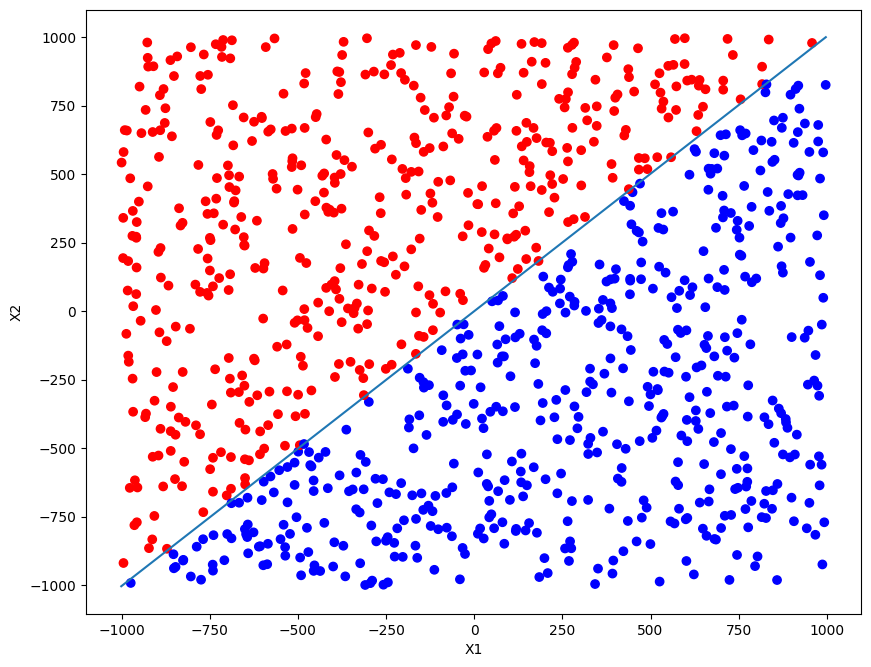

In [16]:
Teste1.grafico()